# CHAPTER 2: _Better programming principles for efficient data science_

---

## Use `filter` in place of _for-loop_ when possible

In [1]:
ONE_MILLION = list(range(int(1e6)))

def for_loop():
    result = []
    for ele in ONE_MILLION:
        if not ele % 3:
            result.append(ele)
    return result

def list_comprehension():
    return [num for num in ONE_MILLION if not num % 3]

def filter_fn():
    return filter(lambda x: not x % 3, ONE_MILLION)

In [2]:
%%timeit -r20 -n5
for_loop()

50.7 ms ± 3.88 ms per loop (mean ± std. dev. of 20 runs, 5 loops each)


In [3]:
%%timeit -r20 -n5
list_comprehension()

40.8 ms ± 2.91 ms per loop (mean ± std. dev. of 20 runs, 5 loops each)


In [4]:
%%timeit -r20 -n5
filter_fn()

202 ns ± 69 ns per loop (mean ± std. dev. of 20 runs, 5 loops each)


## Use `set` to find unique elements

In [5]:
import random
random_lst = [random.randint(1,100) for _ in range(100000)]

def unique_for_loop():
    unique_elements = []
    for ele in random_lst:
        if ele not in random_lst:
            unique_elements.append(ele)
    return unique_elements

def unique_set():
    return list(set(random_lst))

In [6]:
%%timeit -r20 -n5
unique_for_loop()

124 ms ± 5.13 ms per loop (mean ± std. dev. of 20 runs, 5 loops each)


In [7]:
%%timeit -r20 -n5
unique_set()

864 µs ± 171 µs per loop (mean ± std. dev. of 20 runs, 5 loops each)


### Combining `in` with sets

In [8]:
a_long_list = [random.randint(1,100) for _ in range(100000)]
duplicates_removed = set(a_long_list)
ele = 22

if ele in duplicates_removed:
    print(f"The element {ele} exists in the list")

The element 22 exists in the list


## Use specialized data structure for counting

Many a times, we need to count the frequency of variables or elements from a large corpus of text or blob of data. One natural instinct is to construct a dictionary where the variables are stored as keys and their corresponding count as the integer values.

For this kind of situations involving counting, we can use a specialized data structure called `Counter` from the `collections` module of Python. We will see that using this built-in data structure, we can make the code compact, organized, and faster.

In [9]:
from collections import Counter

In [10]:
text = """It was the best of times, it was the worst of times, 
it was the age of wisdom, it was the age of foolishness, 
it was the epoch of belief, it was the epoch of incredulity, 
it was the season of Light, it was the season of Darkness, 
it was the spring of hope, it was the winter of despair, 
we had everything before us, we had nothing before us, 
we were all going direct to Heaven, we were all going direct the other way – 
in short, the period was so far like the present period, 
that some of its noisiest authorities insisted on its being received, 
for good or for evil, in the superlative degree of comparison only
"""

In [11]:
def word_counts(text):
    dict_words = {}
    for w in text.split(' '):
        if w in dict_words.keys():
            dict_words[w]+=1
        else:
            dict_words[w] = 1
    return dict_words

In [12]:
%%timeit -r1000 -n10
word_counts(text)

The slowest run took 4.17 times longer than the fastest. This could mean that an intermediate result is being cached.
35.1 µs ± 13.1 µs per loop (mean ± std. dev. of 1000 runs, 10 loops each)


In [13]:
%%timeit -r1000 -n10
dict_words = word_counts(text)
sorted([(v,i) for i,v in dict_words.items()],reverse=True)[:5]

The slowest run took 4.80 times longer than the fastest. This could mean that an intermediate result is being cached.
52.9 µs ± 21.1 µs per loop (mean ± std. dev. of 1000 runs, 10 loops each)


In [14]:
dict_words = word_counts(text)
sorted([(v,i) for i,v in dict_words.items()],reverse=True)[:5]

[(14, 'the'), (12, 'of'), (11, 'was'), (5, 'it'), (4, '\nit')]

In [15]:
dict_words.items()

dict_items([('It', 1), ('was', 11), ('the', 14), ('best', 1), ('of', 12), ('times,', 2), ('it', 5), ('worst', 1), ('\nit', 4), ('age', 2), ('wisdom,', 1), ('foolishness,', 1), ('epoch', 2), ('belief,', 1), ('incredulity,', 1), ('season', 2), ('Light,', 1), ('Darkness,', 1), ('spring', 1), ('hope,', 1), ('winter', 1), ('despair,', 1), ('\nwe', 2), ('had', 2), ('everything', 1), ('before', 2), ('us,', 2), ('we', 2), ('nothing', 1), ('were', 2), ('all', 2), ('going', 2), ('direct', 2), ('to', 1), ('Heaven,', 1), ('other', 1), ('way', 1), ('–', 1), ('\nin', 1), ('short,', 1), ('period', 1), ('so', 1), ('far', 1), ('like', 1), ('present', 1), ('period,', 1), ('\nthat', 1), ('some', 1), ('its', 2), ('noisiest', 1), ('authorities', 1), ('insisted', 1), ('on', 1), ('being', 1), ('received,', 1), ('\nfor', 1), ('good', 1), ('or', 1), ('for', 1), ('evil,', 1), ('in', 1), ('superlative', 1), ('degree', 1), ('comparison', 1), ('only\n', 1)])

In [16]:
%%timeit -r1000 -n10
counter_words = Counter(text.split(' '))

22.1 µs ± 6.67 µs per loop (mean ± std. dev. of 1000 runs, 10 loops each)


In [17]:
counter_words = Counter(text.split(' '))
counter_words.items()

dict_items([('It', 1), ('was', 11), ('the', 14), ('best', 1), ('of', 12), ('times,', 2), ('it', 5), ('worst', 1), ('\nit', 4), ('age', 2), ('wisdom,', 1), ('foolishness,', 1), ('epoch', 2), ('belief,', 1), ('incredulity,', 1), ('season', 2), ('Light,', 1), ('Darkness,', 1), ('spring', 1), ('hope,', 1), ('winter', 1), ('despair,', 1), ('\nwe', 2), ('had', 2), ('everything', 1), ('before', 2), ('us,', 2), ('we', 2), ('nothing', 1), ('were', 2), ('all', 2), ('going', 2), ('direct', 2), ('to', 1), ('Heaven,', 1), ('other', 1), ('way', 1), ('–', 1), ('\nin', 1), ('short,', 1), ('period', 1), ('so', 1), ('far', 1), ('like', 1), ('present', 1), ('period,', 1), ('\nthat', 1), ('some', 1), ('its', 2), ('noisiest', 1), ('authorities', 1), ('insisted', 1), ('on', 1), ('being', 1), ('received,', 1), ('\nfor', 1), ('good', 1), ('or', 1), ('for', 1), ('evil,', 1), ('in', 1), ('superlative', 1), ('degree', 1), ('comparison', 1), ('only\n', 1)])

In [18]:
%%timeit -r1000 -n10
counter_words.most_common(5)

The slowest run took 18.32 times longer than the fastest. This could mean that an intermediate result is being cached.
12.5 µs ± 8.15 µs per loop (mean ± std. dev. of 1000 runs, 10 loops each)


In [19]:
counter_words.most_common(5)

[('the', 14), ('of', 12), ('was', 11), ('it', 5), ('\nit', 4)]

## Use `Itertools` for combinatorial data structures

In [20]:
num_features = ['num_feature-'+str(i) for i in range(1,5)]
cat_features = ['cat_feature-'+str(i) for i in range(1,5)]

In [21]:
num_features

['num_feature-1', 'num_feature-2', 'num_feature-3', 'num_feature-4']

In [22]:
cat_features

['cat_feature-1', 'cat_feature-2', 'cat_feature-3', 'cat_feature-4']

In [23]:
from itertools import product, permutations, combinations

In [24]:
#prod_list = list(product(num_features,cat_features,repeat=2))
perm_list = list(permutations(zip(num_features, cat_features),2))

In [25]:
for i in perm_list:
    print(i, end=', ')

(('num_feature-1', 'cat_feature-1'), ('num_feature-2', 'cat_feature-2')), (('num_feature-1', 'cat_feature-1'), ('num_feature-3', 'cat_feature-3')), (('num_feature-1', 'cat_feature-1'), ('num_feature-4', 'cat_feature-4')), (('num_feature-2', 'cat_feature-2'), ('num_feature-1', 'cat_feature-1')), (('num_feature-2', 'cat_feature-2'), ('num_feature-3', 'cat_feature-3')), (('num_feature-2', 'cat_feature-2'), ('num_feature-4', 'cat_feature-4')), (('num_feature-3', 'cat_feature-3'), ('num_feature-1', 'cat_feature-1')), (('num_feature-3', 'cat_feature-3'), ('num_feature-2', 'cat_feature-2')), (('num_feature-3', 'cat_feature-3'), ('num_feature-4', 'cat_feature-4')), (('num_feature-4', 'cat_feature-4'), ('num_feature-1', 'cat_feature-1')), (('num_feature-4', 'cat_feature-4'), ('num_feature-2', 'cat_feature-2')), (('num_feature-4', 'cat_feature-4'), ('num_feature-3', 'cat_feature-3')), 

In [26]:
list(product(num_features, cat_features,repeat=1))

[('num_feature-1', 'cat_feature-1'),
 ('num_feature-1', 'cat_feature-2'),
 ('num_feature-1', 'cat_feature-3'),
 ('num_feature-1', 'cat_feature-4'),
 ('num_feature-2', 'cat_feature-1'),
 ('num_feature-2', 'cat_feature-2'),
 ('num_feature-2', 'cat_feature-3'),
 ('num_feature-2', 'cat_feature-4'),
 ('num_feature-3', 'cat_feature-1'),
 ('num_feature-3', 'cat_feature-2'),
 ('num_feature-3', 'cat_feature-3'),
 ('num_feature-3', 'cat_feature-4'),
 ('num_feature-4', 'cat_feature-1'),
 ('num_feature-4', 'cat_feature-2'),
 ('num_feature-4', 'cat_feature-3'),
 ('num_feature-4', 'cat_feature-4')]

In [27]:
lst_features = []
for i in num_features:
    for j in cat_features:
        lst_features.append((i,j))

In [28]:
lst_features

[('num_feature-1', 'cat_feature-1'),
 ('num_feature-1', 'cat_feature-2'),
 ('num_feature-1', 'cat_feature-3'),
 ('num_feature-1', 'cat_feature-4'),
 ('num_feature-2', 'cat_feature-1'),
 ('num_feature-2', 'cat_feature-2'),
 ('num_feature-2', 'cat_feature-3'),
 ('num_feature-2', 'cat_feature-4'),
 ('num_feature-3', 'cat_feature-1'),
 ('num_feature-3', 'cat_feature-2'),
 ('num_feature-3', 'cat_feature-3'),
 ('num_feature-3', 'cat_feature-4'),
 ('num_feature-4', 'cat_feature-1'),
 ('num_feature-4', 'cat_feature-2'),
 ('num_feature-4', 'cat_feature-3'),
 ('num_feature-4', 'cat_feature-4')]

In [29]:
num_features = ['num_feature-'+str(i) for i in range(1,11)]
cat_features = ['cat_feature-'+str(i) for i in range(1,11)]

In [30]:
%%timeit -r100 -n10
list(product(num_features, cat_features,repeat=1))

5.48 µs ± 1.57 µs per loop (mean ± std. dev. of 100 runs, 10 loops each)


In [31]:
%%timeit -r100 -n10
lst_features = []
for i in num_features:
    for j in cat_features:
        lst_features.append((i,j))

The slowest run took 14.48 times longer than the fastest. This could mean that an intermediate result is being cached.
20.7 µs ± 12.8 µs per loop (mean ± std. dev. of 100 runs, 10 loops each)


In [32]:
num_features = ['num_feature-'+str(i) for i in range(1,5)]
cat_features = ['cat_feature-'+str(i) for i in range(1,5)]

In [33]:
comb_features = list(combinations(num_features+cat_features, r=5))

In [34]:
for i,f in enumerate(comb_features):
    print(f"Model {i}", end=': ')
    for f1 in f:
        print(f1, end=', ')
    print()

Model 0: num_feature-1, num_feature-2, num_feature-3, num_feature-4, cat_feature-1, 
Model 1: num_feature-1, num_feature-2, num_feature-3, num_feature-4, cat_feature-2, 
Model 2: num_feature-1, num_feature-2, num_feature-3, num_feature-4, cat_feature-3, 
Model 3: num_feature-1, num_feature-2, num_feature-3, num_feature-4, cat_feature-4, 
Model 4: num_feature-1, num_feature-2, num_feature-3, cat_feature-1, cat_feature-2, 
Model 5: num_feature-1, num_feature-2, num_feature-3, cat_feature-1, cat_feature-3, 
Model 6: num_feature-1, num_feature-2, num_feature-3, cat_feature-1, cat_feature-4, 
Model 7: num_feature-1, num_feature-2, num_feature-3, cat_feature-2, cat_feature-3, 
Model 8: num_feature-1, num_feature-2, num_feature-3, cat_feature-2, cat_feature-4, 
Model 9: num_feature-1, num_feature-2, num_feature-3, cat_feature-3, cat_feature-4, 
Model 10: num_feature-1, num_feature-2, num_feature-4, cat_feature-1, cat_feature-2, 
Model 11: num_feature-1, num_feature-2, num_feature-4, cat_featu

## Python’s `time` module is your friend

In [35]:
from time import time, sleep

In [36]:
# Function which just sleeps for 2 seconds
def sleep_fn():
    sleep(2)

In [37]:
t1 = time()
sleep_fn()
t2 = time()
print("Elapsed time: ", t2-t1)

Elapsed time:  2.0085196495056152


### Need loops for fast code

In [38]:
t1 = time()
s=sum([i for i in range(10)])
t2 = time()
print("Sum: ", s)
print("Elapsed time: ", t2-t1)

Sum:  45
Elapsed time:  0.0


In [39]:
NUM_LOOPS = 10000
t1 = time()
for _ in range(NUM_LOOPS):
    s=sum([i for i in range(10)])
t2 = time()
print("Sum: ", s)
print("Elapsed time: ", t2-t1)
print("Average time: ", (t2-t1)/NUM_LOOPS)

Sum:  45
Elapsed time:  0.009997367858886719
Average time:  9.997367858886719e-07


### Timing decorator

In [40]:
from functools import wraps
from time import time

def timing(func):
    @wraps(func)
    def wrap(*args, **kw):
        ts = time()
        result = func(*args, **kw)
        te = time()
        print (f"Function '{func.__name__}' with arguments {args}, keywords {kw} took {te-ts} seconds to run")
        return result
    return wrap

In [41]:
import numpy as np
@timing
def std_dev(n=10000):
    a = np.random.randint(1,1000,size=n)
    s = a.std()
    return s

In [42]:
std_dev(n=1000000)

Function 'std_dev' with arguments (), keywords {'n': 1000000} took 0.014983892440795898 seconds to run


288.3815779322714

In [43]:
std_dev(n=10000000)

Function 'std_dev' with arguments (), keywords {'n': 10000000} took 0.1381065845489502 seconds to run


288.34350226690316

In [44]:
def gettime(func):
    @wraps(func)
    def wrap(*args, **kw):
        ts = time()
        result = func(*args, **kw)
        te = time()
        tdelta= round(1000*(te-ts),3)
        return tdelta
    return wrap

In [45]:
@gettime
def matrix_mult(n=100):
    matrix_1 = np.random.normal(size=(n,n))
    matrix_2 = np.random.normal(size=(n,n))
    result = np.matmul(matrix_1,matrix_2)
    return result

In [46]:
@gettime
def matrix_inv(n=100):
    matrix = np.random.normal(size=(n,n))
    result = np.linalg.inv(matrix)
    return result

In [47]:
matrix_inv(n=2000)

696.05

In [48]:
matrix_mult(n=100)

1.0

In [49]:
matrix_mult_time = [matrix_mult(1000*i) for i in range(1,11)]

In [50]:
matrix_mult_time

[93.745,
 443.416,
 1157.762,
 2161.568,
 3815.971,
 6222.734,
 9502.611,
 12849.854,
 19240.381,
 26666.636]

In [51]:
import matplotlib.pyplot as plt

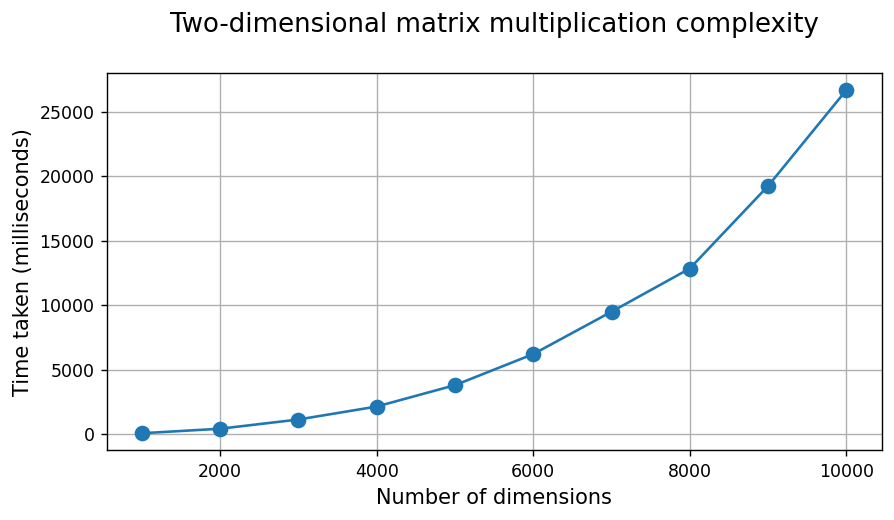

In [52]:
dims = [1000*i for i in range(1,11)]
plt.figure(figsize=(8,4),dpi=125)
plt.title("Two-dimensional matrix multiplication complexity\n",fontsize=15)
plt.plot(dims,matrix_mult_time,marker='o',markersize=8)
#plt.xticks([i for i in range(5,30,5)])
plt.xlabel("Number of dimensions",fontsize=12)
plt.ylabel("Time taken (milliseconds)",fontsize=12)
plt.grid(True)
plt.show()

## Jupyter magic commands

In [53]:
%timeit sum(range(100000))

2.46 ms ± 297 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [54]:
%timeit np.sum(np.arange(100000))

94.6 µs ± 3.08 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [55]:
%%timeit
s = 0
for i in range(100000):
    s+=i

5.31 ms ± 259 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [56]:
%%timeit -n50 -r10
s = 0
for i in range(100000):
    s+=i

5.73 ms ± 500 µs per loop (mean ± std. dev. of 10 runs, 50 loops each)
